In [29]:
import nest_asyncio
nest_asyncio.apply()

# Agents as tools

No handoffs used. Agents use other agents as tools acheiving the same result as the handoffs version.

The Orchestrator agent uses the researcher to write an article and then uses the Format aget to format it. The Researcher uses one of the Writer agents to produce the article.

In [30]:
from agents import Agent, Runner, function_tool, handoff
from pydantic import BaseModel

class PRArticle(BaseModel):
    article_text: str
    commentary: str

adult_writer_agent = Agent(
    name="Adult Writer Agent",
    instructions="""Write the article based on the information given that it is suitable for adults interested in culture. 
                    Be mature.""", 
    model="gpt-4o",
)

teen_writer_agent = Agent(
    name="Teen Writer Agent",
    instructions="""Write the article based on the information given that it is suitable for teenagers who want to have a good time. 
                    Be cool!""", 
    model="gpt-4o",
)

kid_writer_agent = Agent(
    name="Kid Writer Agent",
    instructions="""Write the article based on the information given that it is suitable for kids of around 8 years old. 
                    Be enthusiastic!""", 
    model="gpt-4o",
)

format_agent = Agent(
    name="Format Agent",
    instructions=f"""Edit the article to add a title and subtitles and ensure the text is formatted as Markdown. Return only the text of article.""", 
    model="gpt-4o",
)

researcher_agent = Agent(
    name="Research agent",
    instructions="""You are a Travel Agent who will find useful information for your customers of all ages.
                    Find information on the destination(s) given. 
                    When you have a result send it to the appropriate writer agent to produce a short PR text.
                    When you have the result send it to the Format agent for final processing.
                    Return the text of the PR piece only""",
    model="gpt-4o",
    tools = [kid_writer_agent.as_tool(
                tool_name="kids_article_writer",
                tool_description="Write an essay for kids",), 
            teen_writer_agent.as_tool(
                tool_name="teen_article_writer",
                tool_description="Write an essay for teens",), 
            adult_writer_agent.as_tool(
                tool_name="adult_article_writer",
                tool_description="Write an essay for adults",),
            format_agent.as_tool(
                tool_name="format_article",
                tool_description="Add titles and subtitles and format as Markdown",
        ),],
    output_type = PRArticle
)


In [31]:
from IPython.display import display, Markdown

In [32]:
result = Runner.run_sync(researcher_agent, "The destination is Paris, France. The customers are adults.")

In [33]:
display(Markdown(result.final_output.article_text))

# Exploring the Allure of Paris: A Romantic and Cultural Getaway

## Iconic Landmarks

Paris is a city of romance, culture, and history. Known for its iconic landmarks such as the Eiffel Tower, Notre-Dame Cathedral, and the Louvre Museum, Paris offers an unparalleled experience for adults seeking a mix of adventure and relaxation.

## Culinary Delights

The city's charming cafes, world-class restaurants, and picturesque streets make it a perfect destination for exploring the French cuisine and art scene.

## Memorable Activities

Whether enjoying a cruise on the Seine River or strolling through Montmartre, Paris promises memories that will last a lifetime.


In [34]:
result = Runner.run_sync(researcher_agent, "The destination is Paris, France. The customers are teenagers.")


In [35]:
display(Markdown(result.final_output.article_text))

# Discovering Paris: A Teen's Ultimate Adventure Guide

Hey there, adventure seekers! If you're dreaming of a trip that mixes culture, style, and just plain fun, Paris should be at the top of your list. The City of Light is packed with incredible spots that guarantee an unforgettable experience.

## Snap-Worthy Spots

First stop, the iconic **Eiffel Tower**. Not only is it the perfect backdrop for your Instagram feed, but catching the view from the top is next-level amazing. Don’t forget to time it right to catch the magical light show in the evening!

## Art Vibes

Feel like getting artsy? Head to the **Louvre Museum**. Yes, it’s massive, but you can still get up close to world-famous pieces like the Mona Lisa. Plus, it’s a great excuse to perfect your “art critic” pose.

## Chill in the Latin Quarter

Wander through the lively **Latin Quarter** where every corner has something cool to offer. Pop into quirky boutiques, or take a break at a cozy café. Make sure to try some savory crepes or classic French pastries; they're the perfect energy boost for exploring.

## Seine Soirées

For a laid-back vibe, stroll along the **River Seine**. There’s nothing like watching the world go by from its picturesque banks, or even better, hop on a boat tour for a fresh perspective of the city’s landmarks.

## Shop 'Til You Drop

Fashion fanatics, rejoice! The **Champs-Élysées** is your go-to destination for trendy stores and epic window-shopping. Whether you're hunting for the latest styles or just enjoying the buzzing atmosphere, this avenue is pure perfection.

## Epic Parisian Adventures

Paris is where history meets style, and there’s something for everyone. Whether you're exploring, snapping pics, shopping, or just chilling, this vibrant city guarantees a mix of adventure and inspiration that any teenager would love. So, pack your bags, grab your camera, and get ready to make memories that’ll last a lifetime. Paris is waiting!

In [36]:
result = Runner.run_sync(researcher_agent, "The destination is Paris, France. The customers are kids.")

In [37]:
display(Markdown(result.final_output.article_text))

# Discover the Magic of Paris, France!

Hey there, young explorers! Are you ready to travel to a city full of wonders? Let's take an imaginary trip to Paris, France! Grab your berets and croissants, and let’s dive into the magic of this amazing place.

## The Eiffel Tower

First stop, the **Eiffel Tower**! This giant iron structure is one of the most famous landmarks in the world. Did you know it was built over 130 years ago? You can go all the way to the top and see the entire city from up there. Imagine being a bird flying high above Paris!

## Delicious French Treats

Paris is also known for its yummy food. Ever heard of **crêpes**? They're like fancy pancakes, and you can fill them with chocolate, fruit, or even cheese and ham. And don’t forget to try a flaky **croissant** for breakfast!

## The Artistic Louvre

Next, let’s visit the **Louvre Museum**. It's like a castle full of art! There, you can see the famous painting of the **Mona Lisa**. She’s got a mysterious smile that everyone talks about. There are also cool sculptures and ancient treasures. It’s like an adventure through history!

## Stroll in the Parks

If you love nature, you’ll enjoy the beautiful **Tuileries Garden**. It’s a perfect place for a picnic or a fun game of hide and seek. You can even sail little boats in the pond. How cool is that?

## Magical Notre-Dame

Finally, let’s take a peek at the **Notre-Dame Cathedral**. This magnificent church has tall towers and colorful stained glass windows. It’s like stepping into a fairy tale!

## Final Thoughts

Paris is a city of lights, magic, and adventure. Whether you're imagining yourself as an artist, a chef, or a brave explorer, this city has something special for everyone. So, when you dream about traveling to faraway lands, remember that Paris is always ready to welcome you with open arms!

Au revoir, young adventurers! Until next time! 🌟🥐🎨

In [38]:
from agents.extensions.visualization import draw_graph


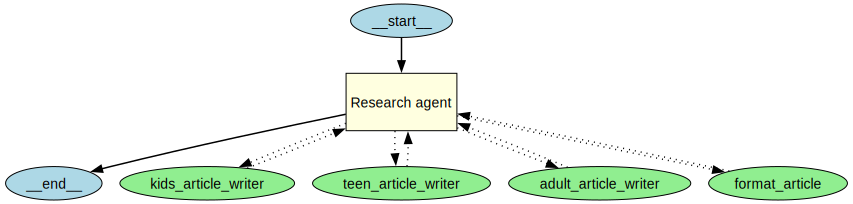

In [39]:
draw_graph(researcher_agent)